In this notebook, I am trying to figure out how *Data Augmentation* technique works in *Deep Learning* applictions. Data Augmentation is the technique of generating new data from the original dataset to make our model more robust, achieve better accuracy, and get new dataset with more samples that can help increase the ability of the model to generalize.

# Data Preperation

I am going to use `simpsons dataset` which consists of images for 10 different characters of Simpsons series, each image is labeled with one of the characters. The dataset is already splited into train and test datasets.

First download the dataset:

In [1]:
# Downloading the dataset
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" -o simpsons_dataset_train.pkl

!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" -o simpsons_dataset_test.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2241      0 --:--:-- --:--:-- --:--:--  2229
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  129M    0  129M    0     0  66.4M      0 --:--:--  0:00:01 --:--:--  198M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    369      0 --:--:--  0:00:01 --:--:--   369
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 32.4M    0 32.4M    0     0  14.6M      0 --:--:--  0:00:02 --:--:-- 14.6M


This downloads two Python pickle files, one for the training (`simpsons_dataset_train.pkl`) and one for the test set (`simpsons_dataset_test.pkl`). Both files contain a dictionary, the key `features` holds the images, the key `labels` the label ids. You can inspect the downloaded files in the sidebar on the left, under the *Files* tab.  The following code loads the dataset:

Load the dataset to memory:

In [2]:
import pickle
with open('simpsons_dataset_test.pkl', 'rb') as f:
    test = pickle.load(f)
with open('simpsons_dataset_train.pkl', 'rb') as f:
    train = pickle.load(f)
    
x_test, y_test = test['features'], test['labels']
x_train, y_train = train['features'], train['labels']

I will train the same classification model for two different datasets: the original one, and the augmented one. We have to take part of the training dataset to use it for validation. `train_test_split` function in `sklearn.model_selection` helps to split the data taking into consideration different labels balance ratio in the training and validation datasets. We can achieve the balance by using the `stratify` parameter.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

# Dataset visualization

Datasets size:

In [4]:
print('train samples:', x_train.shape)
print('test samples:', x_test.shape)
print('validation samples:', x_valid.shape)

train samples: (8835, 64, 64, 3)
test samples: (2767, 64, 64, 3)
validation samples: (2209, 64, 64, 3)


Size of each label:

In [5]:
import numpy as np

unique_classes = np.unique(y_train)
print('unique classes:', unique_classes)

for cls in unique_classes:
  print('class #{}, train count: {}, test count: {}, validation count: {}'.format(
      cls, 
      (y_train == cls).sum(),
      (y_test == cls).sum(),
      (y_valid == cls).sum()
    ))

unique classes: [0 1 2 3 4 5 6 7 8 9]
class #0, train count: 858, test count: 269, validation count: 215
class #1, train count: 763, test count: 239, validation count: 191
class #2, train count: 1437, test count: 450, validation count: 359
class #3, train count: 771, test count: 242, validation count: 193
class #4, train count: 866, test count: 271, validation count: 217
class #5, train count: 826, test count: 259, validation count: 206
class #6, train count: 691, test count: 216, validation count: 172
class #7, train count: 929, test count: 291, validation count: 232
class #8, train count: 930, test count: 291, validation count: 233
class #9, train count: 764, test count: 239, validation count: 191


Look at some images:

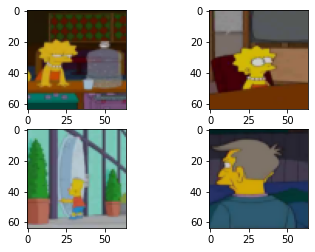

In [6]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[0,:])
axarr[0,1].imshow(x_train[1,:])
axarr[1,0].imshow(x_train[2,:])
axarr[1,1].imshow(x_train[3,:])

# Dataset normalization

Dataset normalization is essential part of any machine learning pipeline, it is proven that using normalized dataset helps to get more robust models. There are different normalizaton methods, I choose normalization that keeps the data in [-1,1] range.

In [7]:
print('x_train shape:', x_train.shape, 'mean:', np.mean(x_train), 'std:', np.std(x_train), 'min:', np.min(x_train), 'max:', np.max(x_train))

x_train = (x_train.astype('float32') - 128.) / 128.
x_valid = (x_valid.astype('float32') - 128.) / 128.
x_test = (x_test.astype('float32') - 128.) / 128.

print('\nAfter normalization:')
print('x_train shape:', x_train.shape, 'mean:', np.mean(x_train), 'std:', np.std(x_train), 'min:', np.min(x_train), 'max:', np.max(x_train))

x_train shape: (8835, 64, 64, 3) mean: 103.54859782868209 std: 62.92433219376137 min: 0 max: 255

After normalization:
x_train shape: (8835, 64, 64, 3) mean: -0.19102679 std: 0.491597 min: -1.0 max: 0.9921875


In order to build our classification model with softmax output layer, we need to use the `one-hot-enconding`.

In [8]:
from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)
y_train = np_utils.to_categorical(y_train)

In [9]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Train the classification model

I use modified LeNet architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 8 filters
- An AveragePooling layer
- A convolutional layer with 3x3 kernel and 16 filters
- An AveragePooling layer
- A fully connected layer of 100 units
- A fully connected layer of 60 units
- A fully connected layer with softmax activation, having the same number of units as classes

All layers have ReLU activations.

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, Input, Flatten
from tensorflow.keras.models import Model, Sequential

def get_model():
  input = Input(x_train[0].shape)
  output = Conv2D(8, (5, 5), activation='relu')(input)
  output = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(output)
  output = Conv2D(16, (3, 3), activation='relu')(output)
  output = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(output)
  output = Flatten()(output)
  output = Dense(100, activation='relu')(output)
  output = Dense(60, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  return Model(inputs=input, outputs=output)


model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 8)         608       
_________________________________________________________________
average_pooling2d (AveragePo (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700

Train the model:

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=50, 
                    validation_data=(x_valid, y_valid), shuffle=True)

Epoch 1/50
139/139 [==============================] - 31s 14ms/step - loss: 1.7700 - accuracy: 0.3902 - val_loss: 1.4510 - val_accuracy: 0.5315
Epoch 2/50
139/139 [==============================] - 1s 10ms/step - loss: 1.3232 - accuracy: 0.5600 - val_loss: 1.2904 - val_accuracy: 0.5822
Epoch 3/50
139/139 [==============================] - 1s 10ms/step - loss: 1.1230 - accuracy: 0.6345 - val_loss: 1.1631 - val_accuracy: 0.6193
Epoch 4/50
139/139 [==============================] - 1s 9ms/step - loss: 0.9555 - accuracy: 0.6952 - val_loss: 1.0684 - val_accuracy: 0.6573
Epoch 5/50
139/139 [==============================] - 1s 9ms/step - loss: 0.7896 - accuracy: 0.7448 - val_loss: 1.0514 - val_accuracy: 0.6718
Epoch 6/50
139/139 [==============================] - 1s 9ms/step - loss: 0.6517 - accuracy: 0.7919 - val_loss: 1.0292 - val_accuracy: 0.6813
Epoch 7/50
139/139 [==============================] - 1s 9ms/step - loss: 0.5248 - accuracy: 0.8298 - val_loss: 1.0809 - val_accuracy: 0.6750
Ep

Now that the model has finished training, let's plot the accuracy and loss over time

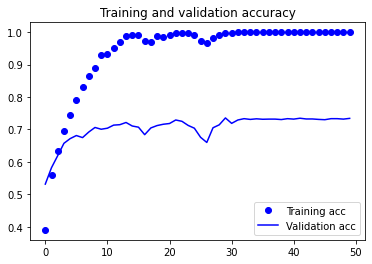

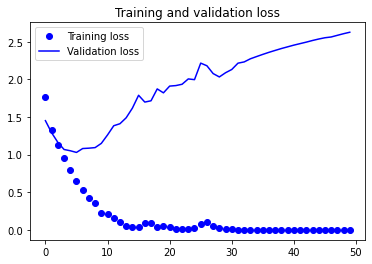

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can notice that the accuarcy curve is improving over time on the training set but it is get worser or not imporving on the validation set and the same apply for the loss curve, thus we are suffering from overfitting problem. We can solve the overfitting problem:
- Add dropout layers.
- Increase the size of our training set (new samples + augmentation).
- Try another model (with less number of trainable paramters).
- Use transfer learning technique.

I am going to use the data augmentation technique trying to overcome the overfitting problem.

# Improving the method

`ImageDataGenerator` function in `tensorflow.keras` is really helpful method to apply data augmentation, you can check the description of each parameter in tensorflow [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Early stopping is also another method to overcome the overfitting problem, it stops the model training when one of the validation metrics got worser. You can check the parameter's desciptions of `EarlyStopping` method in the keras [documentation](https://keras.io/api/callbacks/early_stopping/).

In [14]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [15]:
model = get_model()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

Train the classification model with the augmented dataset:

In [16]:
batch_size = 64
steps_per_epoch = len(x_train)//batch_size

it = datagen.flow(x_train, y_train, batch_size=batch_size)

history = model.fit_generator(
      it,
      steps_per_epoch=steps_per_epoch,
      epochs=200,
      validation_data=(x_valid, y_valid),
      callbacks=[es])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
138/138 [==============================] - 13s 91ms/step - loss: 1.9949 - accuracy: 0.2969 - val_loss: 1.5959 - val_accuracy: 0.4889
Epoch 2/200
138/138 [==============================] - 13s 92ms/step - loss: 1.7193 - accuracy: 0.4166 - val_loss: 1.3796 - val_accuracy: 0.5419
Epoch 3/200
138/138 [==============================] - 12s 89ms/step - loss: 1.5777 - accuracy: 0.4654 - val_loss: 1.3303 - val_accuracy: 0.5536
Epoch 4/200
138/138 [==============================] - 12s 89ms/step - loss: 1.5005 - accuracy: 0.4900 - val_loss: 1.2453 - val_accuracy: 0.5799
Epoch 5/200
138/138 [==============================] - 13s 92ms/step - loss: 1.4321 - accuracy: 0.5131 - val_loss: 1.2444 - val_accuracy: 0.5790
Epoch 6/200
138/138 [==============================] - 13s 93ms/step - loss: 1.3746 - accuracy: 0.5337 - val_loss: 1.1383 - val_accuracy: 0.6166
Epoch 7/200
138/138 [==============================] - 12s 89ms/step - loss: 1.3203 - accuracy: 0.5479 - val_loss: 1.1005 - val_ac

Show the learning curves:

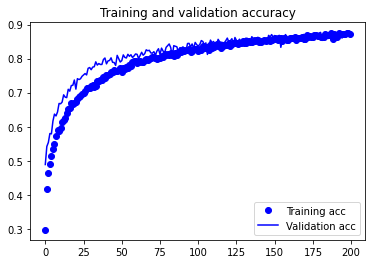

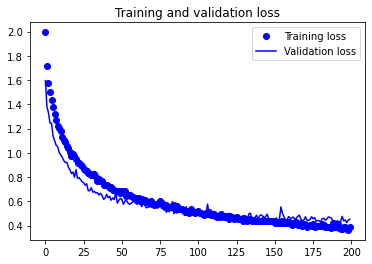

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation

In [18]:
_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 86.38
